## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression and classification differ in their outputs. Regression predicts a numeric outcome and classification predicts a categorical outcome.
2. A confusion table measures the performance of a classification model by comparing its predictions to the actual output. This is useful as it conceptualizes error. The confusion table itself is a matrix that cross-tabulates the predicted and true values.
3. SSE stands for sume of squared error. To calculate SSE the values of the squared difference from the prediction to the true outcome for each point in a set are added. This quantifies reliability of a model and can be used to pick the most optimal k with the lowest SSE value.
4. Overfitting is when the model is unrealistically precise and the value of k is very small. This occurs when the model is too complex to reliably explain observations produced by the model. Underfitting, in contrast, has a large k value and is when the model is unrealistically imprecise. This occurs when the model is too simple to explain observations.
5. Choosing k by evaluating SSE on the test set it important because the test set is data the model was not trained out. Therefore by evaluating SSE for the test set, we can observe the accuracy of the model to predict unseen data and therefore improve it. If we were to just look at the training data, we would risk overfitting the training data.
6. Reporting class label as a prediction is useful in that it gives one distinct value that is easy to interpret. Nevertheless, by only producing the categorical label we have no measure of the certainty or uncertainty with which the prediction was made. Through reporting as a probability distribution we can adress some of these problems in that the user is able to see the uncertainty and filter based on certain levels of it. On the down side, this distribution requires more work and calibration fitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
df_USACars = pd.read_csv('./USA_cars_datasets.csv', low_memory=False)
df_cars = df_USACars[['price', 'year', 'mileage']]

In [3]:
print("df_cars Dimensions:")
print(df_cars.shape, '\n')

print("df_cars Variables:")
print(df_cars.dtypes, '\n')

df_cars.head()

df_cars Dimensions:
(2499, 3) 

df_cars Variables:
price      int64
year       int64
mileage    int64
dtype: object 



,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [4]:
missing = df_cars.isnull().sum()
missing

,0
price,0
year,0
mileage,0


In [5]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = df_cars.loc[:,['year','mileage']]

X = X.apply(maxmin)
X.head()

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


In [6]:
y = df_cars['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes



In [7]:
def knn_reg(x_hat,df_cars,K):
    squared_differences = (x_hat - df_cars.loc[:,['year','mileage']])**2
    distances = np.sum( squared_differences , axis = 1)
    neighbors = np.argsort(distances)[:K].tolist()
    y_star = df_cars['price'].iloc[neighbors].tolist()
    y_hat = np.mean(y_star)
    return {'y_hat':y_hat, 'y_star':y_star, 'neighbors':neighbors}

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [19]:
def statics(k):
    y = df_cars['price']
    X = df_cars.loc[:,['year','mileage']]

    X = X.apply(maxmin)

    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_pred = fitted_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for k={k}: {mse:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    lo = min(y_test.min(), y_pred.min())
    hi = max(y_test.max(), y_pred.max())
    plt.plot([lo, hi], [lo, hi], 'k--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs. Predicted Prices (k={k})')
    plt.show()

    return model, mse


MSE for k=3: 133487993.50


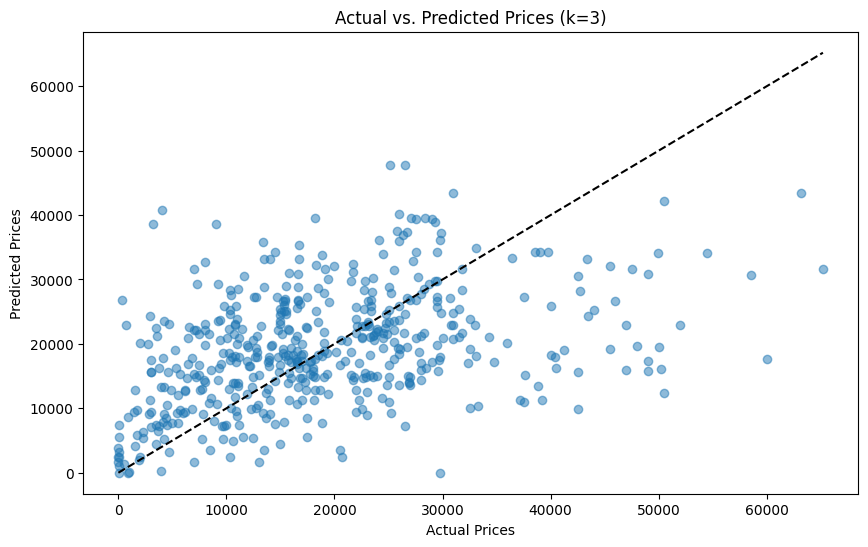

(KNeighborsRegressor(n_neighbors=3), 133487993.49644443)

In [20]:
statics(k=3)

MSE for k=10: 111588702.62


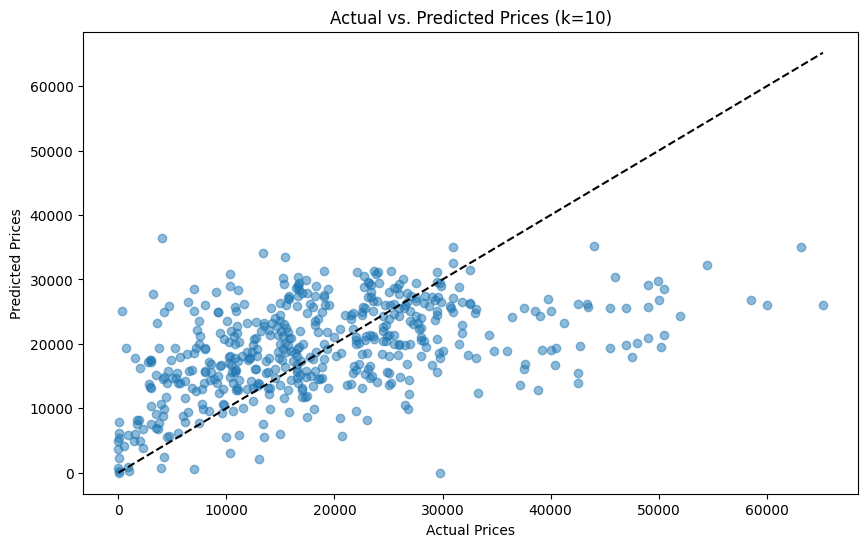

(KNeighborsRegressor(n_neighbors=10), 111588702.61873999)

In [13]:
statics(k=10)

MSE for k=25: 104962784.87


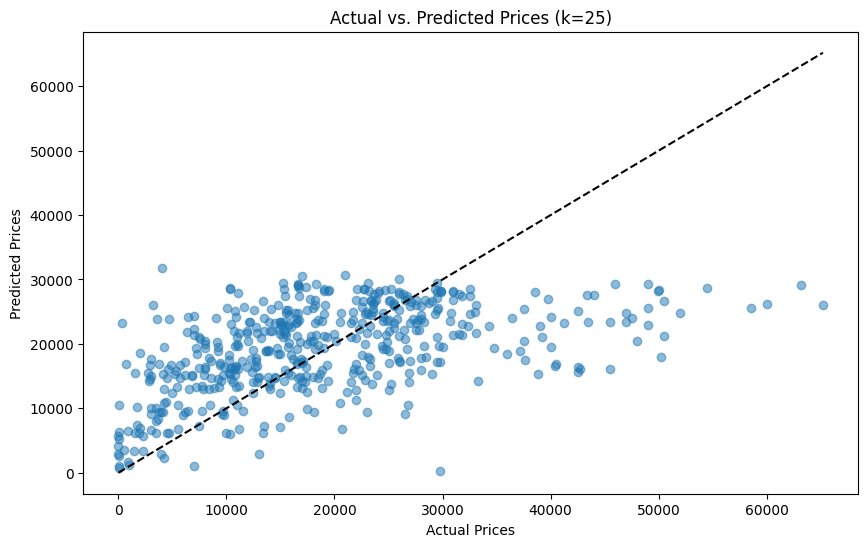

(KNeighborsRegressor(n_neighbors=25), 104962784.87012799)

In [14]:
statics(k=25)

MSE for k=50: 103873193.22


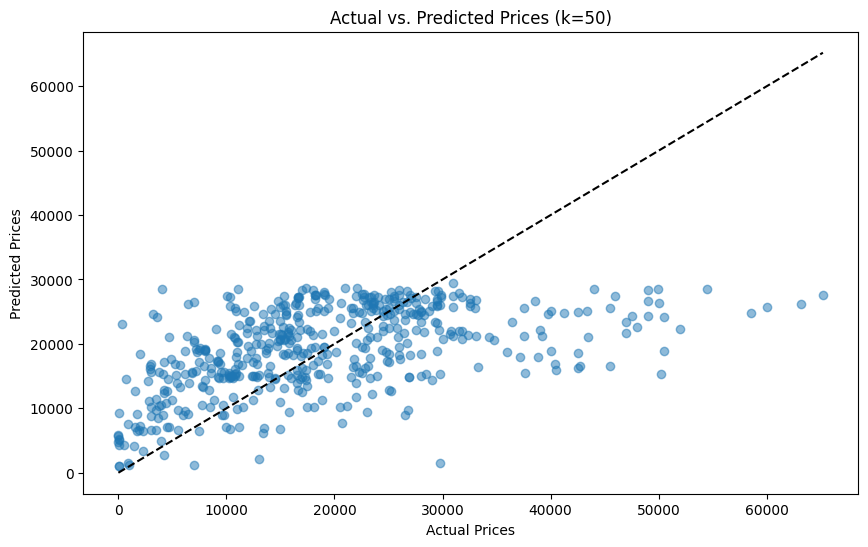

(KNeighborsRegressor(n_neighbors=50), 103873193.2199608)

In [15]:
statics(k=50)

MSE for k=100: 104534999.26


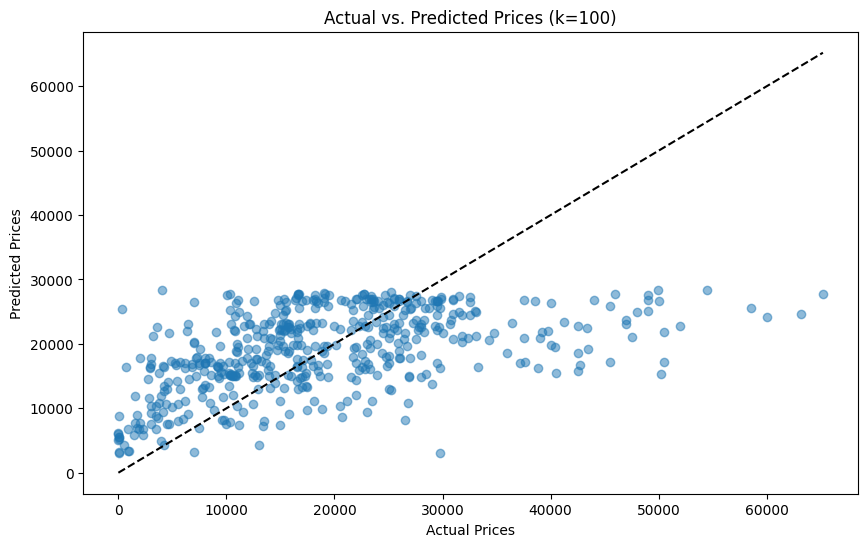

(KNeighborsRegressor(n_neighbors=100), 104534999.25921261)

In [16]:
statics(k=100)

MSE for k=300: 107657680.74


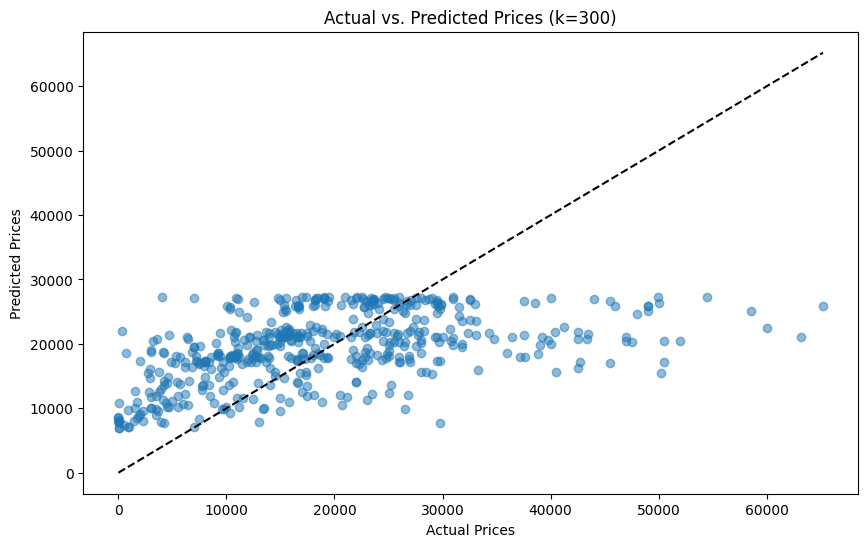

(KNeighborsRegressor(n_neighbors=300), 107657680.73624039)

In [17]:
statics(k=300)

As k increases the points go from more random locations to being located around the diagonal line which indicates a 1:1 ratio or equal value between predicted and actual. However, as k continues to increase even further the points start to form a horizontal line.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.